In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import numpy as np


In [2]:
cols=pd.read_csv("header.csv")
dff = pd.read_csv("2018_ST4000DM000.csv", usecols=cols)

In [3]:
dff.head(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-01-01,Z305B2QN,ST4000DM000,4000787030016,0,120.0,2346048.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,Z305DEMG,ST4000DM000,4000787030016,0,116.0,115775056.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,Z3023VGH,ST4000DM000,4000787030016,0,114.0,66649120.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Z305DEMX,ST4000DM000,4000787030016,0,114.0,71636216.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,Z306WYZZ,ST4000DM000,4000787030016,0,115.0,98756616.0,NaN,NaN,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# down sample the datastet, 0-581, 1-581


df_1 = dff[dff['failure'] == 1]
df_1.head(3)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
4797,2018-01-01,Z300GZ1B,ST4000DM000,4000787030016,1,108.0,17846936.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22252,2018-01-01,Z300GZCV,ST4000DM000,4000787030016,1,110.0,25274512.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33512,2018-01-02,S300V3AD,ST4000DM000,4000787030016,1,111.0,76075666.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_0 = dff[(dff.serial_number.isin(df_1['serial_number']))  & (dff.failure == 0)].sample(581)


In [6]:
df = pd.concat([df_0, df_1])
df.head(10)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
1125625,2018-02-05,Z305833E,ST4000DM000,4000787030016,0,114.0,78819576.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087439,2018-05-13,Z304JCWC,ST4000DM000,4000787030016,0,117.0,156979232.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5111141,2018-06-18,Z305ACLS,ST4000DM000,4000787030016,0,115.0,88778376.0,NaN,NaN,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8283415,2018-10-19,Z304KC77,ST4000DM000,4000787030016,0,108.0,19326160.0,NaN,NaN,92.0,...,22.0,22.0,NaN,NaN,NaN,NaN,100.0,0.0,100.0,0.0
642904,2018-01-21,S301NYAD,ST4000DM000,4000787030016,0,117.0,156635256.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6404725,2018-08-05,Z302525M,ST4000DM000,4000787030016,0,114.0,60575744.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7096666,2018-09-01,Z304HWKW,ST4000DM000,4000787030016,0,116.0,103528888.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1673193,2018-02-23,Z304KBQQ,ST4000DM000,4000787030016,0,114.0,59092144.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1277507,2018-02-10,Z3025M94,ST4000DM000,4000787030016,0,119.0,203674144.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6324753,2018-08-02,Z304L8L7,ST4000DM000,4000787030016,0,100.0,2872096.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cols_raw=filter(lambda x: 'raw' in x, list(df.columns))
cols_nomrmalized=filter(lambda x: 'normalized' in x, list(df.columns))

df_raw = df[cols_raw]
df_norm = df[cols_nomrmalized]

,smart_1_normalized,smart_2_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_8_normalized,smart_9_normalized,smart_10_normalized,smart_11_normalized,...,smart_223_normalized,smart_225_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized,smart_250_normalized,smart_251_normalized,smart_252_normalized,smart_254_normalized,smart_255_normalized
703877,118.0,NaN,91.0,100.0,100.0,81.0,NaN,56.0,100.0,NaN,...,99.0,99.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398229,116.0,NaN,96.0,100.0,100.0,74.0,NaN,76.0,100.0,NaN,...,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7856311,96.0,NaN,92.0,100.0,99.0,87.0,NaN,66.0,100.0,NaN,...,100.0,80.0,100.0,100.0,83.0,20.0,NaN,NaN,100.0,100.0
3698918,112.0,NaN,92.0,100.0,99.0,81.0,NaN,74.0,100.0,NaN,...,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN
3127338,118.0,NaN,91.0,100.0,100.0,84.0,NaN,56.0,100.0,NaN,...,NaN,NaN,100.0,100.0,200.0,NaN,NaN,NaN,NaN,NaN


In [8]:
target = df[['failure']]

df1 = pd.concat([df_norm, target], axis=1)

X = df1.drop(['failure'], axis=1).values
y = df1['failure'].values

unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 581]
 [  1 581]]


In [9]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score, classification_report

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 390]
 [  1 423]]
[[  0 191]
 [  1 158]]


In [12]:
eval_set = [(x_train, y_train), (x_test, y_test)]
clf = XGBClassifier(objective ='reg:logistic',
                    n_estimators = 150,
                    learning_rate = 0.01,
                    max_depth = 8,
                    subsample = 0.8,
                    colsample_bytree = 0.8,
                    gamma = 0)

#eval_metric = ["auc","error"]
#eval_metric = ["logloss"]
eval_metric = ["auc"]
%time clf.fit(x_train, y_train, early_stopping_rounds=10, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

y_pred = clf.predict(x_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy",accuracy)

[0]	validation_0-auc:0.805759	validation_1-auc:0.731427
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.845381	validation_1-auc:0.742395
[2]	validation_0-auc:0.851615	validation_1-auc:0.762691
[3]	validation_0-auc:0.856389	validation_1-auc:0.785788
[4]	validation_0-auc:0.861375	validation_1-auc:0.787743
[5]	validation_0-auc:0.864697	validation_1-auc:0.79268
[6]	validation_0-auc:0.868585	validation_1-auc:0.789996
[7]	validation_0-auc:0.877314	validation_1-auc:0.790195
[8]	validation_0-auc:0.883173	validation_1-auc:0.783849
[9]	validation_0-auc:0.883161	validation_1-auc:0.792398
[10]	validation_0-auc:0.882133	validation_1-auc:0.793492
[11]	validation_0-auc:0.884294	validation_1-auc:0.796093
[12]	validation_0-auc:0.883176	validation_1-auc:0.796358
[13]	validation_0-auc:0.890813	validation_1-auc:0.799258
[14]	validation_0-auc:0.888843	validation_1-auc:0.796806

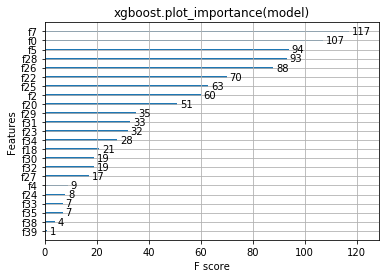

In [13]:
import seaborn as sns

xgb.plot_importance(clf)
plt.title("xgboost.plot_importance(model)")
plt.show()

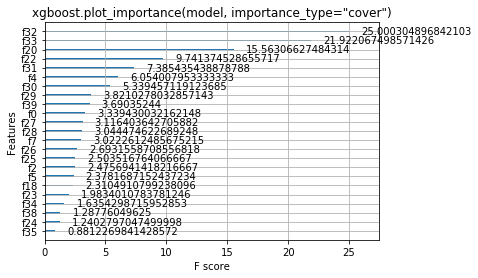

In [15]:
xgb.plot_importance(clf, importance_type="gain")
plt.title('xgboost.plot_importance(model, importance_type="cover")')
plt.show()
